In [263]:
import pandas as pd
import os
from datetime import datetime

### Task 1. Merge the 12 months sales data into a single csv file

In [264]:
#files = [file for file in os.listdir('./Sales_Data')]

In [265]:
#for file in files:
#   print(file)

In [266]:
#all_months_data = pd.DataFrame()
#for file in files:
#    df = pd.read_csv("./Sales_Data/"+file)
#    all_months_data = pd.concat([all_months_data,df])

In [267]:
#all_months_data.to_csv("all_data.csv", index=False)


### Read the new dataframe and drop NAs

In [268]:
all_data = pd.read_csv("all_data.csv").dropna().reset_index()

### Data Cleaning

In [269]:
all_data['Month'] = all_data['Order Date'].str[0:2]

In [270]:
all_data[all_data['Order Date'] == 'Order Date']

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
254,254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
702,705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1098,1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2868,2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3696,3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...,...
183138,183671,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
183478,184012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
183507,184041,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
183740,184275,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [271]:
all_data = all_data[all_data['Order Date'] != 'Order Date']

In [272]:
all_data['Month'] = all_data['Month'].astype('int32')

In [273]:
all_data.columns

Index(['index', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month'],
      dtype='object')

### Convert columns to correct data types

In [274]:
all_data['Quantity Ordered'][0]

'1'

In [275]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

In [276]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Add Sales Column

In [277]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [278]:
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Qn1. What was the best month for sales? How much was earned that month?


In [279]:
bestmonth = pd.pivot_table(all_data, index='Month', aggfunc="sum")

In [280]:
bestmonth.sort_values(by='Sales', ascending=False)

,Price Each,Quantity Ordered,Sales,index
Month,,,,
12,4.588415e+06,28114,4.613443e+06,316571540
10,3.715555e+06,22703,3.736727e+06,2581524241
4,3.367671e+06,20558,3.390670e+06,627638793
11,3.180601e+06,19798,3.199603e+06,1902495872
5,3.135125e+06,18667,3.152607e+06,1507432409
3,2.791208e+06,17005,2.807100e+06,956665983
7,2.632540e+06,16072,2.647776e+06,2373553784
6,2.562026e+06,15253,2.577802e+06,2438815388
8,2.230345e+06,13448,2.244468e+06,919618753


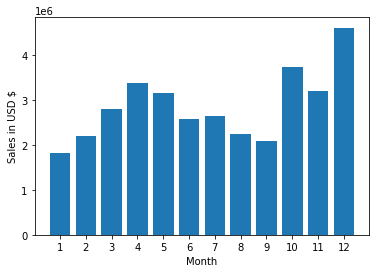

In [281]:
import matplotlib.pyplot as plt
months = range(1, 13)
plt.bar(months, bestmonth['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD $')
plt.xlabel('Month')
plt.show()


### Qn2. What city had the highest number of sales?

In [282]:
all_data.columns

Index(['index', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales'],
      dtype='object')

In [283]:
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [284]:
#all_data['city'] = all_data['Purchase Address'].str.split(',').str[1]+','+all_data['Purchase Address'].str.split(',').str[2]

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['city'] = all_data['Purchase Address'].apply(lambda x: get_city(x) +','+get_state(x))
all_data.head()


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City,NY"
1,1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City,NY"
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City,NY"
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco,CA"
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta,GA"


In [285]:
citysales = all_data.groupby('city').sum()
citysales.sort_values(by='Sales',ascending=False)

,index,Quantity Ordered,Price Each,Month,Sales
city,,,,,
"San Francisco,CA",4182207907,50239,8.211462e+06,315520,8.262204e+06
"Los Angeles,CA",2770256638,33289,5.421435e+06,208325,5.452571e+06
"New York City,NY",2315958610,27932,4.635371e+06,175741,4.664317e+06
"Boston,MA",1863134629,22528,3.637410e+06,141112,3.661642e+06
"Atlanta,GA",1390765871,16602,2.779908e+06,104794,2.795499e+06
"Dallas,TX",1386431384,16730,2.752628e+06,104620,2.767975e+06
"Seattle,WA",1375694681,16553,2.733296e+06,104941,2.747755e+06
"Portland,OR",931110479,11303,1.860558e+06,70621,1.870732e+06
"Austin,TX",925650013,11153,1.809874e+06,69829,1.819582e+06


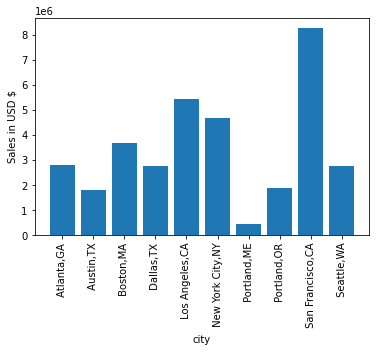

In [286]:
cities = [city for city, df in all_data.groupby('city')]
plt.bar(cities, citysales['Sales'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in USD $')
plt.xlabel('city')
plt.show()

### What time should we display ads to maximize likelihood of customer's buying product?

In [290]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [293]:
all_data['hour'] = all_data['Order Date'].dt.hour

In [299]:
ads_hour = all_data.groupby('hour').count()


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


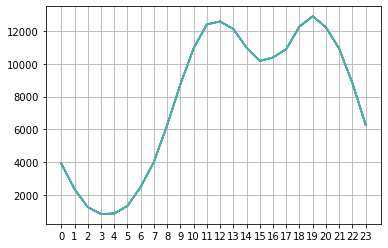

In [303]:
hours = [hours for hours, df in all_data.groupby('hour')]
plt.plot(hours, all_data.groupby(['hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

### What products are sold together

In [318]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'grouped']].drop_duplicates()
df.head()

<ipython-input-318-6ce8c1e9d535>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [320]:
from itertools import combinations
from collections import Counter

In [323]:
count = Counter()
for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]